# Классификация с помощью дерева решений

Исходный код: https://github.com/ellkrauze/decision_tree_classification

## Задание
1. Разработайте программу, которая выполняет классификацию заданного набора данных с помощью дерева решений. Параметрами программы являются набор данных, критерий выбора атрибута разбиения (Information gain, Gain ratio, Gini index).

2. Проведите эксперименты на двух наборах из различных предметных областей. Наборы данных должны существенно отличаться друг от друга по количеству атрибутов и/или классов. Например, наборы grades (сведения об оценках школьников за письменную контрольную работу: скачать данные в формате CSV, скачать zip-архив с описанием) и Census Income (данные о результатах переписи населения, в т.ч. о годовом доходе -- ниже или выше $50000: скачать обучающую выборку в формате CSV, тестовую выборку в формате CSV, скачать описание). В качестве обучающей выборки для построения дерева используйте 100% исходных данных.

3. Выполните визуализацию построенных деревьев решений.

4. Доработайте программу, добавив в список ее параметров долю, которую занимает обучающая выборка от общего размера набора данных, и обеспечив вычисление и выдачу в качестве результатов следующих показателей качества классификации: аккуратность (accuracy), точность (precision), полнота (recall), F-мера.

5. Проведите эксперименты на ранее выбранных наборах данных, фиксируя критерий выбора атрибута разбиения и варьируя соотношение мощностей обучающей и тестовой выборок от 60%:40% до 90%:10% с шагом 10%.

6. Выполните визуализацию полученных результатов в виде следующих диаграмм: построенные деревья решений для заданного набора данных; показатели качества классификации в зависимости от соотношения мощностей обучающей и тестовой выборок для заданного набора данных.

**Параметры**: набор данных, критерий выбора атрибута разбиения (Information gain, Gain ratio, Gini index), доля, которую занимает обучающая выборка от общего размера набора данных.

**Вывод**: аккуратность (accuracy), точность (precision), полнота (recall), F-мера.

In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics 
from sklearn import tree
%matplotlib inline

In [3]:
# Split train and test data 
# based on given test size
# Parameters:
# - df is given dataset
# - class_col is the label column
# - test_size is the proportion of the dataset to include in the train split
def get_splitted_train_test(df, class_col, test_size):
    # Declare feature vector and target variable 
    X = df.drop([class_col], axis=1)
    y = df[class_col]
    # Split data into separate training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    return (X_train, X_test, y_train, y_test)

In [126]:
def get_encoded_X_data(X_train, X_test):
    # encode variables with ordinal encoding
    cols = X_train.columns.values.tolist()
    encoder = ce.OrdinalEncoder(cols=cols)
    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)
    return (X_train, X_test)

# Get Started Here

In [139]:
def run(dataset, label, test_size_arr):
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    f1_arr = []
    for test_size in test_size_arr:
        # Split train and test data
        X_train, X_test, y_train, y_test= get_splitted_train_test(dataset, label, test_size)

        # Encode categorical variables
        X_train, X_test = get_encoded_X_data(X_train, X_test)

        # Create and fit model
        model = DecisionTreeClassifier(criterion=CRITERION, max_depth=3, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Save metrics
        accuracy_arr.append(sklearn.metrics.accuracy_score(y_test, y_pred))
        precision_arr.append(sklearn.metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1))
        recall_arr.append(sklearn.metrics.recall_score(y_test, y_pred, average='weighted', zero_division=1))
        f1_arr.append(sklearn.metrics.f1_score(y_test, y_pred, average='weighted'))

    return [accuracy_arr, precision_arr, recall_arr, f1_arr]


In [ ]:
DATASET_PATH = os.path.join('datasets','adult.data')
CLASS = "income" # label
cols = ['age', 'workclass', 'fnlwgt', 'education', 
'education-num', 'marital-status', 'occupation',
'relationship', 'race', 'sex', 'capital-gain', 
'capital-loss', 'hours-per-week', 'native-country', 'income']
dataset = pd.read_csv(DATASET_PATH, names=cols)

In [140]:
DATASET_PATH = os.path.join('datasets','grades.csv')
CLASS = "GRADE"
dataset = pd.read_csv(DATASET_PATH)

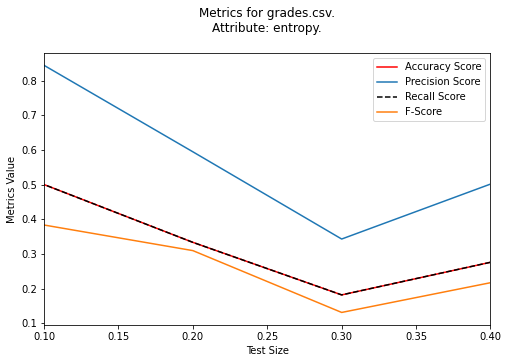

In [143]:
CRITERION = 'gini' # gini index
# CRITERION = 'entropy' # information gain
test_size_arr = [0.4, 0.3, 0.2, 0.1]

# Get metrics results
metrics = run(dataset, CLASS, test_size_arr)

# Visualize 
fig, ax = plt.subplots()

ax.plot(test_size_arr, metrics[0], 'r-', label = 'Accuracy Score')
ax.plot(test_size_arr, metrics[1], label = 'Precision Score')
ax.plot(test_size_arr, metrics[2], 'k--', label = 'Recall Score')
ax.plot(test_size_arr, metrics[3], label = 'F-Score')

ax.legend()
ax.set(xlabel='Test Size', ylabel='Metrics Value')
ax.set_title('Metrics for ' + os.path.basename(DATASET_PATH) + '.\n' +
            'Attribute: ' + CRITERION + '.\n')
ax.set_xlim([0.1, 0.4])

fig.set_figheight(5)
fig.set_figwidth(8)
plt.facecolor = 1 # disable transparent background
plt.show()

### Decision Tree

In [127]:
# Visualize decision-tree

plt.figure(figsize=(12,8))

X = dataset.drop([CLASS], axis=1)
y = dataset[CLASS]

X, y = get_encoded_X_data(X, y)
model = tree.DecisionTreeClassifier(random_state=0)

tree.plot_tree(model.fit(X, y))

ValueError: Unexpected input dimension 1, expected 8

<Figure size 864x576 with 0 Axes>